In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
np.random.seed(42)

n = 200
task_completion = np.random.uniform(0.4, 1.0, n)
feedback = np.random.uniform(5, 10, n)
attendance = np.random.uniform(0.6, 1.0, n)

performance = 0.5*(task_completion*100) + 0.3*(feedback*10) + 0.2*(attendance*100) + np.random.normal(0, 5, n)

data = pd.DataFrame({
    'task_completion_rate': task_completion,
    'avg_feedback_score': feedback,
    'attendance_rate': attendance,
    'performance_score': performance
})
data.head()


,task_completion_rate,avg_feedback_score,attendance_rate,performance_score
0,0.624724,8.210158,0.641250,66.040381
1,0.970429,5.420700,0.961021,80.039588
2,0.839196,5.808144,0.802101,74.891116
3,0.759195,9.492771,0.930583,79.873515
4,0.493611,8.032145,0.728020,60.569145


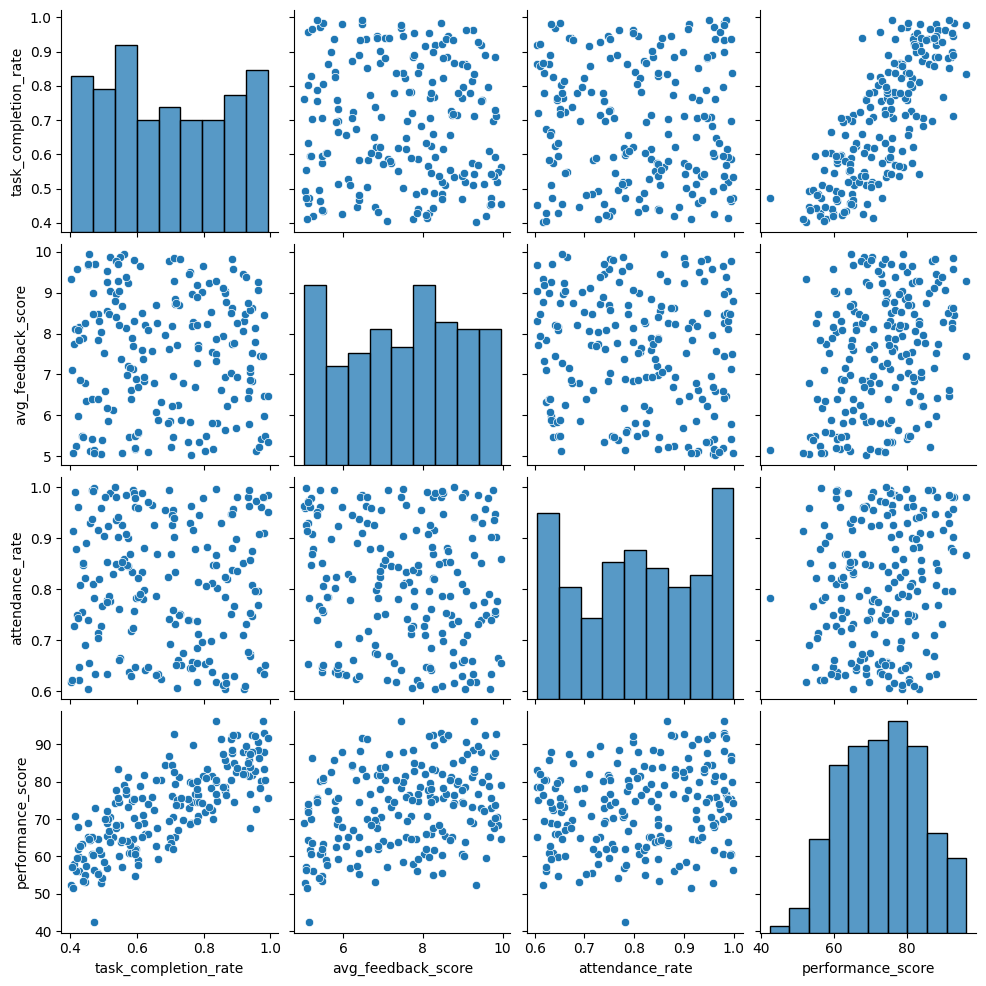

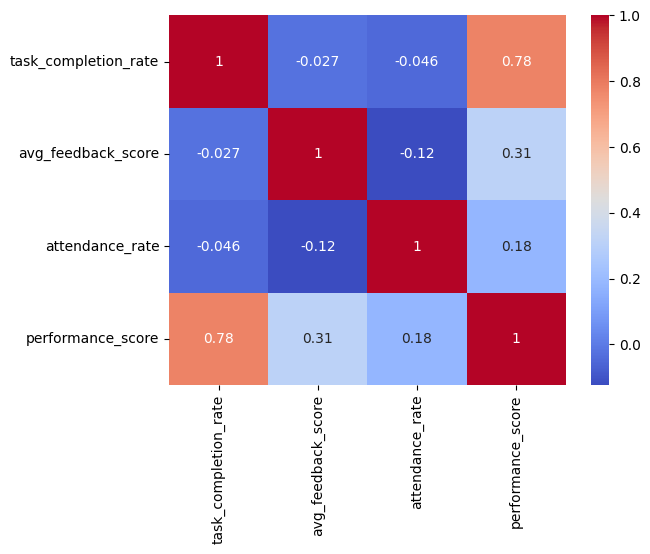

In [3]:
sns.pairplot(data)
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [4]:
X = data[['task_completion_rate', 'avg_feedback_score', 'attendance_rate']]
y = data['performance_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest Results:
MAE: 4.36237750807448
MSE: 29.206596033306642
R²: 0.7564259253886035


In [6]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R²:", r2_score(y_test, y_pred_xgb))


XGBoost Results:
MAE: 4.708148107740409
MSE: 40.23090428120346
R²: 0.6644865676952229


In [7]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'MAE': [mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_xgb)],
    'R²': [r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_xgb)]
})
print(results)


           Model       MAE        R²
0  Random Forest  4.362378  0.756426
1        XGBoost  4.708148  0.664487


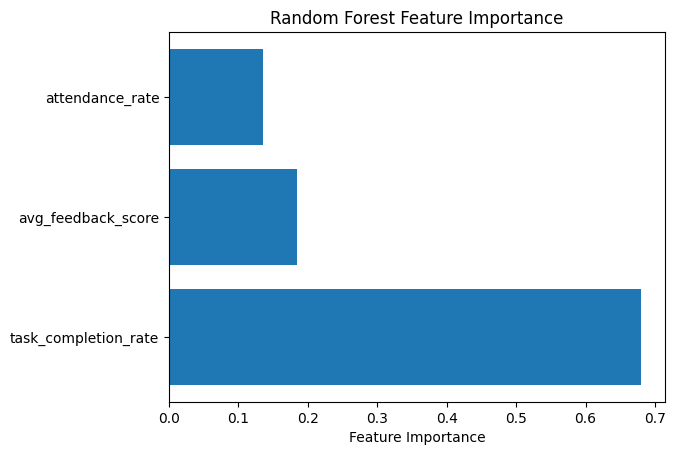

In [8]:
importances = rf.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()
